In [1]:
import os
import sys
from os import listdir
from os.path import isfile, join
import IPython.display as ipd
import librosa 
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile as wav
import numpy as np
from timeit import default_timer as timer

# Implementing the CNN with Chroma_STFT 

In [2]:
filename='E:/Thesis/Dataset/UrbanSound8K/audio/fold3/6988-5-0-4.wav'
ipd.Audio(filename)

In [3]:
def extract_ChromaSTFT(filename):
    audio, sample_rate=librosa.load(filename , res_type='kaiser_fast')
    chroma2=np.mean(librosa.feature.chroma_stft(y=audio , sr=sample_rate,n_chroma=100).T, axis=0)
    
    return chroma2

In [4]:
filename='E:/Thesis/Dataset/UrbanSound8K/audio/fold3/6988-5-0-4.wav'
a=extract_ChromaSTFT(filename)
print(a.shape)
print(a)

(100,)
[0.71073055 0.7123847  0.7044737  0.69590735 0.6844858  0.6675733
 0.655128   0.644395   0.63736254 0.6316822  0.6226408  0.6209991
 0.6216056  0.62829554 0.627453   0.62561417 0.62227094 0.61476207
 0.6166835  0.6302711  0.6386763  0.6346287  0.62640953 0.6240178
 0.63117445 0.64297414 0.64769006 0.6440547  0.6386423  0.6366436
 0.6379153  0.639142   0.6429856  0.64116657 0.64520943 0.6532511
 0.66302544 0.6762746  0.6829736  0.6881988  0.69197416 0.69397473
 0.7034716  0.71574694 0.7290389  0.74636394 0.7691324  0.78239316
 0.7851265  0.77965736 0.7757453  0.77430594 0.78509593 0.7953851
 0.80605286 0.82154316 0.83761895 0.8501756  0.8507442  0.8469856
 0.84693176 0.857828   0.8711234  0.8779558  0.880086   0.8647168
 0.8512665  0.8382616  0.83225447 0.82387567 0.82186097 0.82585585
 0.83130485 0.8213127  0.7952469  0.7847135  0.78406465 0.7892147
 0.7953357  0.80022967 0.8062858  0.8160047  0.82360154 0.83639586
 0.85420614 0.8629131  0.86011475 0.85247487 0.8376123  0.814859

C:\Users\User\Anaconda3\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [5]:
a=np.reshape((a),(20,5))

In [6]:
print(a.shape)

(20, 5)


In [7]:
print(a)

[[0.71073055 0.7123847  0.7044737  0.69590735 0.6844858 ]
 [0.6675733  0.655128   0.644395   0.63736254 0.6316822 ]
 [0.6226408  0.6209991  0.6216056  0.62829554 0.627453  ]
 [0.62561417 0.62227094 0.61476207 0.6166835  0.6302711 ]
 [0.6386763  0.6346287  0.62640953 0.6240178  0.63117445]
 [0.64297414 0.64769006 0.6440547  0.6386423  0.6366436 ]
 [0.6379153  0.639142   0.6429856  0.64116657 0.64520943]
 [0.6532511  0.66302544 0.6762746  0.6829736  0.6881988 ]
 [0.69197416 0.69397473 0.7034716  0.71574694 0.7290389 ]
 [0.74636394 0.7691324  0.78239316 0.7851265  0.77965736]
 [0.7757453  0.77430594 0.78509593 0.7953851  0.80605286]
 [0.82154316 0.83761895 0.8501756  0.8507442  0.8469856 ]
 [0.84693176 0.857828   0.8711234  0.8779558  0.880086  ]
 [0.8647168  0.8512665  0.8382616  0.83225447 0.82387567]
 [0.82186097 0.82585585 0.83130485 0.8213127  0.7952469 ]
 [0.7847135  0.78406465 0.7892147  0.7953357  0.80022967]
 [0.8062858  0.8160047  0.82360154 0.83639586 0.85420614]
 [0.8629131  0

In [8]:
metadata=pd.read_csv('E:/Thesis/Dataset/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class_name
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [9]:
fold_list = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [10]:
stacked_features = []
exceptions=0

start_time = timer()
for i in range(10):
    # get file names
    mypath = 'E:/Thesis/Dataset/UrbanSound8K/audio/'+ fold_list[i] + '/'
    files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
    
    for fn in files:
        try: # extract features
            chroma_stft= extract_ChromaSTFT(fn)
            features=np.reshape((chroma_stft),(20,5))
            
            
        except: # else exception (.ds_store files are part of mac file systems)
            print(fn)
            exceptions += 1
            continue
            
        l_row = metadata.loc[metadata['slice_file_name']==fn.split('/')[-1]].values.tolist()
        label = l_row[0][-1]
        fold = i+1
    
        stacked_features.append([features, features.shape, label, fold])
        
            #print(f,old_samplerate,ss)
        
print("Exceptions: ", exceptions)
end_time = timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))
print('Finished feature extraction from all folder')

C:\Users\User\Anaconda3\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


E:/Thesis/Dataset/UrbanSound8K/audio/fold1/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold2/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold3/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold4/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold5/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold6/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold7/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold8/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold9/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold10/.DS_Store
Exceptions:  10
time taken: 21.0 minutes 20.9 seconds
None
Finished feature extraction from all folder


In [11]:
cols=['Features_of_Chroma_STFT', 'Matrix_Shape', 'Label', 'Fold']
Stacked_feature_pd=pd.DataFrame(data=stacked_features , columns=cols)
Stacked_feature_pd.head()

,Features_of_Chroma_STFT,Matrix_Shape,Label,Fold
0,"[[0.42396778, 0.43199593, 0.42883915, 0.421227...","(20, 5)",dog_bark,1
1,"[[0.34497955, 0.3550899, 0.349535, 0.3432681, ...","(20, 5)",dog_bark,1
2,"[[0.40839082, 0.40700686, 0.4022976, 0.3984764...","(20, 5)",dog_bark,1
3,"[[0.15034936, 0.12258983, 0.121807754, 0.13158...","(20, 5)",dog_bark,1
4,"[[0.6189676, 0.6135731, 0.5896414, 0.5715963, ...","(20, 5)",gun_shot,1


In [12]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


X = np.array(Stacked_feature_pd.Features_of_Chroma_STFT.tolist())
y = np.array(Stacked_feature_pd.Label.tolist())


le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

Using TensorFlow backend.


In [13]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state=42)

In [14]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, yy.shape)

(6985, 20, 5) (1747, 20, 5) (6985, 10) (1747, 10) (8732, 10)


# Implementing the CNN model

In [15]:
x_train =x_train.reshape(x_train.shape[0], 20, 5, 1)
x_test=x_test.reshape(x_test.shape[0], 20, 5, 1)

print(x_train.shape, x_test.shape)

(6985, 20, 5, 1) (1747, 20, 5, 1)


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

In [17]:
model=Sequential()
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(20,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

In [18]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 5, 64)         1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 3, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 3, 128)        204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 2, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [19]:
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

1747/1747 [==============================] - 1s 629us/step
Pre-training accuracy: 10.5323%


In [20]:
start_time=timer()
history=model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))
end_time=timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))

Train on 6985 samples, validate on 1747 samples
Epoch 1/30
6985/6985 [==============================] - 11s 2ms/step - loss: 2.0950 - accuracy: 0.1946 - val_loss: 1.8143 - val_accuracy: 0.2788
Epoch 2/30
6985/6985 [==============================] - 10s 1ms/step - loss: 1.7214 - accuracy: 0.3519 - val_loss: 1.6257 - val_accuracy: 0.4167
Epoch 3/30
6985/6985 [==============================] - 10s 1ms/step - loss: 1.5422 - accuracy: 0.4399 - val_loss: 1.4559 - val_accuracy: 0.4448
Epoch 4/30
6985/6985 [==============================] - 10s 1ms/step - loss: 1.4006 - accuracy: 0.5037 - val_loss: 1.2673 - val_accuracy: 0.5318
Epoch 5/30
6985/6985 [==============================] - 10s 1ms/step - loss: 1.3111 - accuracy: 0.5373 - val_loss: 1.2153 - val_accuracy: 0.5489
Epoch 6/30
6985/6985 [==============================] - 10s 1ms/step - loss: 1.2257 - accuracy: 0.5702 - val_loss: 1.1826 - val_accuracy: 0.5570
Epoch 7/30
6985/6985 [==============================] - 10s 1ms/step - loss: 1.133

In [21]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9023622274398804
Testing Accuracy:  0.72982257604599


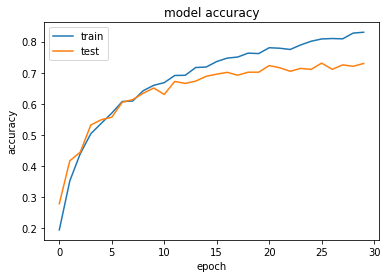

In [22]:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

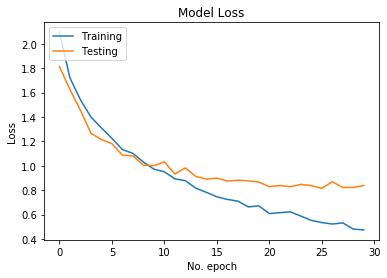

In [23]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Testing')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [24]:
def print_prediction(file_name):
    a=extract_ChromaSTFT(file_name) 
    prediction_feature=np.reshape((a),(20,5))
            
    prediction_feature = prediction_feature.reshape(1, 20, 5, 1)

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [25]:
filename= "E:/Thesis/Dataset/UrbanSound8K/audio/fold5/100852-0-0-0.wav"
print_prediction(filename)
ipd.Audio(filename)

The predicted class is: air_conditioner 

air_conditioner 		 :  0.99783605337142944335937500000000
car_horn 		 :  0.00044170749606564640998840332031
children_playing 		 :  0.00052822555880993604660034179688
dog_bark 		 :  0.00005414657061919569969177246094
drilling 		 :  0.00001134235935751348733901977539
engine_idling 		 :  0.00103393092285841703414916992188
gun_shot 		 :  0.00001653160870773717761039733887
jackhammer 		 :  0.00007415102300001308321952819824
siren 		 :  0.00000089790972879200126044452190
street_music 		 :  0.00000302153671327687334269285202


In [26]:
filename= "E:/Thesis/Dataset/UrbanSound8K/audio/fold10/100648-1-0-0.wav"
print_prediction(filename)
ipd.Audio(filename)

The predicted class is: car_horn 

air_conditioner 		 :  0.00235614879056811332702636718750
car_horn 		 :  0.65506625175476074218750000000000
children_playing 		 :  0.00070135528221726417541503906250
dog_bark 		 :  0.04362678900361061096191406250000
drilling 		 :  0.00724830804392695426940917968750
engine_idling 		 :  0.00019792983948718756437301635742
gun_shot 		 :  0.00000041204881995327014010399580
jackhammer 		 :  0.00002661361577338539063930511475
siren 		 :  0.00516155408695340156555175781250
street_music 		 :  0.28561466932296752929687500000000


In [27]:
Class_Label = {'Air_conditioner':0, 'Car_horn':1, 'Children_playing':2, 'Dog_Bark':3, 
               'Drilling':4,'Engine_idling':5, 'Gun_Shot' :6, 'Jackhammer': 7 ,'Siren':8,'Street_Music':9 }

from sklearn.metrics import classification_report

y_true = np.argmax(y_test, axis = 1)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
labels = [0,1,2,3,4,5,6,7,8,9]
target_names = Class_Label.keys()

print(y_true.shape, y_pred.shape)
print(classification_report(y_true, y_pred, target_names=target_names))

(1747,) (1747,)
                  precision    recall  f1-score   support

 Air_conditioner       0.92      0.82      0.87       195
        Car_horn       0.79      0.82      0.81        73
Children_playing       0.53      0.63      0.58       198
        Dog_Bark       0.51      0.37      0.43       190
        Drilling       0.80      0.69      0.74       222
   Engine_idling       0.83      0.94      0.88       197
        Gun_Shot       0.53      0.67      0.59        57
      Jackhammer       0.81      0.91      0.86       217
           Siren       0.73      0.70      0.71       204
    Street_Music       0.71      0.74      0.73       194

        accuracy                           0.73      1747
       macro avg       0.72      0.73      0.72      1747
    weighted avg       0.73      0.73      0.73      1747



In [28]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_true, y_pred)*100)

72.98225529479106


In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

[[159   0   2   4   0  20   1   4   0   5]
 [  1  60   0   1   2   2   1   2   2   2]
 [  1   0 125  25   0   3  12   3  23   6]
 [  3   3  45  71  17   3   5   7  11  25]
 [  1   7   8   8 153   2   5  19   8  11]
 [  0   1   3   4   1 185   0   1   1   1]
 [  1   0   8   3   3   0  38   3   0   1]
 [  1   0   1   1   2   4   7 198   0   3]
 [  2   1  37  13   4   0   0   1 142   4]
 [  3   4   6   8   9   5   3   5   7 144]]


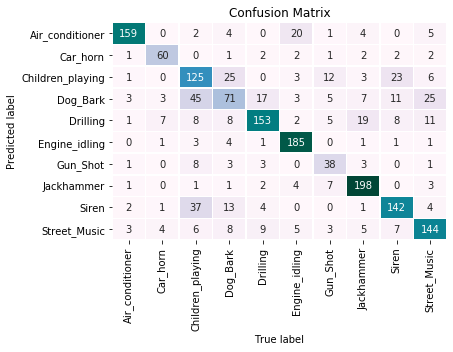

<Figure size 720x288 with 0 Axes>

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax=plt.subplot()
mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,4))
sns.heatmap(mat, square=False, annot=True, fmt='d',cbar=False,linewidths=.5,xticklabels=Class_Label.keys(),yticklabels=Class_Label.keys(), ax=ax, cmap='PuBuGn')
bottom, top= ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top -0.5)
ax.set_title('Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label');

In [31]:
def acc_per_class(np_probs_array):    
    accs = []
    for idx in range(0, np_probs_array.shape[0]):
        correct = np_probs_array[idx][idx].astype(int)
        total = np_probs_array[idx].sum().astype(int)
        acc = (correct / total) * 100
        accs.append(acc)
    return accs

In [32]:
accuracies=acc_per_class(mat)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]

pd.DataFrame({'CLASS':labels, 'ACCURACY': accuracies}).sort_values(by='ACCURACY', ascending=False)

,CLASS,ACCURACY
5,Engine Idling,93.908629
7,Jackhammer,91.244240
1,Car Horn,82.191781
0,Air Conditioner,81.538462
9,Street Music,74.226804
8,Siren,69.607843
4,Drilling,68.918919
6,Gun Shot,66.666667
2,Children Playing,63.131313
3,Dog bark,37.368421


Text(0.5, 1.0, 'Accuracy per Class')

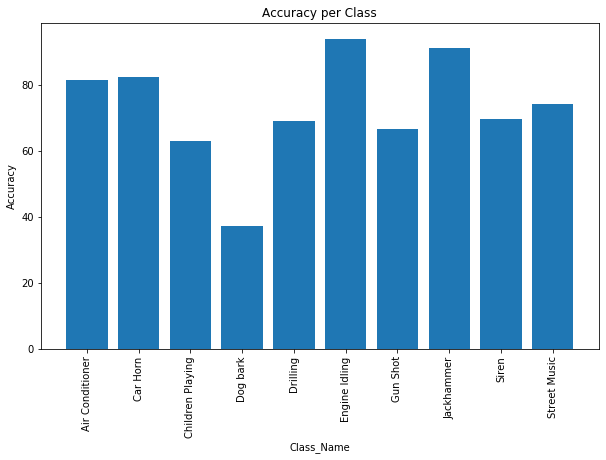

In [33]:
Y=np.around(accuracies , decimals=1)

index=np.arange(len(labels))
plt.figure(figsize=(10,6))
plt.bar(index, Y)
plt.xticks(index, labels, rotation=90)
plt.xlabel('Class_Name')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class')